In [37]:
import pandas as pd
# from sklearn.ensemble
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

def readFile(filename):
    f = pd.read_csv(f'./_data/{filename}.csv')
    return f

def ACCURACY(true, pred):
    score = np.mean(true==pred)
    return score

def z_oForType(data,columnName):
    columns = set(data[columnName].values)
    colNames = {}
    for key, value in enumerate(columns):
        colNames[value] = key
    data[columnName] = data[columnName].map(lambda x: colNames[x])
    #data[columnName] = data[columnName].replace(colNames) 로 해도 된답니다.
    return data

In [39]:
train_data = readFile('train')      #[3231 rows x 14 columns]
#train_data = z_oForType(train_data, 'type')

#print(train_data)
test_data = readFile('test')
#test_data = z_oForType(test_data, 'type')


In [40]:
# 기술 통계(요약통계) 방법으로 데이터 탐색
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3231 non-null   int64  
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   float64
 12  type                  3231 non-null   object 
 13  quality               3231 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.5+ KB


In [ ]:
#전체 샘플은 3,231개, 속성을 나타내는 열은 14개임을 알 수 있다.
# id : 식별 고유값
# fixed acidity : 고정(비휘발성) 산도: 와인과 관련된 대부분의 산
# volatile acidity : 휘발성 산도: 와인에 함유된 아세트산의 양. 너무 높으면 불쾌한 식초 맛이 날 수 있음
# citric acid : 구연산: 소량으로 발견되며, 와인에 풍미를 더할 수 있음
# residual sugar : 잔여 당분: 발효가 멈춘 후 남은 설탕의 양으로 1g/L 미만의 와인은 드물며 45g/L 이상의 와인은 단맛으로 간주함
# chlorides : 염소화물: 와인의 염분량
# free sulfur dioxide : 유리 이산화황: 미생물의 성장과 와인의 산화를 방지함
# total sulfur dioxide : 총 이산화황: 저농도에서는 대부분 맛이 나지 않으나 50ppm 이상의 농도에서 맛에서 뚜렷하게 나타남
# density : 밀도: 알코올 및 당 함량에 따라 변함
# pH : 산성 또는 염기성 정도. 0(매우 산성) ~ 14(매우 염기성). 대부분의 와인은 pH 3-4 사이임
# sulphates : 황산염: 이산화황 농도에 기여할 수 있는 와인 첨가제. 항균 및 항산화제로 작용
# alcohol : 와인의 알코올 함량 백분율
# type : 와인에 사용된 포도의 종류. Red(적포도주), White(백포도주)로 나뉨
# quality : 맛으로 평가된 와인의 품질

In [44]:
# 기술통계 구하기 - 수치형 변수에 대한 기술 통계를 구한다.
train_data.columns = train_data.columns.str.replace(' ', '_')
train_data.head()

id  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0   1            8.0              0.18         0.37             1.3   
1   2            7.5              0.38         0.29             4.9   
2   3            6.1              0.27         0.33             2.2   
3   4            6.4              0.32         0.50            10.7   
4   5            8.4              0.37         0.43             2.3   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.040                 15.0                  96.0  0.99120  3.06   
1      0.021                 38.0                 113.0  0.99026  3.08   
2      0.021                 26.0                 117.0  0.98860  3.12   
3      0.047                 57.0                 206.0  0.99680  3.08   
4      0.063                 12.0                  19.0  0.99550  3.17   

   sulphates  alcohol   type  quality  
0       0.61     12.1  white        6  
1       0.48     13.0  white        7  
2       0.30     12.5  white        6  
3       0.60      9.4  white        5  
4       0.81     11.2    red        7

In [130]:
test_data.columns = test_data.columns.str.replace(' ', '_')
test_data.head()

id  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0   1            7.3              0.31         0.25            6.65   
1   2            8.7              0.70         0.24            2.50   
2   3            6.9              0.63         0.01            2.40   
3   4            6.3              0.23         0.50           10.40   
4   5            6.9              0.54         0.04            3.00   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.032                 30.0                 138.0  0.99244  2.90   
1      0.226                  5.0                  15.0  0.99910  3.32   
2      0.076                 14.0                  39.0  0.99522  3.34   
3      0.043                 61.0                 132.0  0.99542  2.86   
4      0.077                  7.0                  27.0  0.99870  3.69   

   sulphates  alcohol   type  
0       0.37     11.1  white  
1       0.60      9.0    red  
2       0.53     10.8    red  
3       0.46      9.1  white  
4       0.91      9.4    red

In [45]:
train_data.describe()

id  fixed_acidity  volatile_acidity  citric_acid  \
count  3231.000000    3231.000000       3231.000000  3231.000000   
mean   1616.000000       7.205772          0.336072     0.319496   
std     932.853686       1.295494          0.160285     0.145854   
min       1.000000       3.800000          0.080000     0.000000   
25%     808.500000       6.400000          0.227500     0.250000   
50%    1616.000000       7.000000          0.290000     0.310000   
75%    2423.500000       7.700000          0.400000     0.390000   
max    3231.000000      15.900000          1.040000     1.660000   

       residual_sugar    chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
count     3231.000000  3231.000000          3231.000000           3231.000000   
mean         5.454813     0.055890            30.583720            116.256577   
std          4.816098     0.035722            17.387143             55.759070   
min          0.600000     0.012000             1.000000              6.000000   
25%          1.800000     0.038000            17.000000             78.000000   
50%          3.100000     0.047000            29.000000            119.000000   
75%          8.100000     0.064000            42.000000            156.000000   
max         65.800000     0.611000           131.000000            344.000000   

           density           pH    sulphates      alcohol      quality  
count  3231.000000  3231.000000  3231.000000  3231.000000  3231.000000  
mean      0.994667     3.214166     0.531455    10.497108     5.829155  
std       0.003054     0.161873     0.149686     1.193813     0.850003  
min       0.987110     2.720000     0.220000     8.400000     4.000000  
25%       0.992205     3.100000     0.430000     9.500000     5.000000  
50%       0.994840     3.200000     0.510000    10.300000     6.000000  
75%       0.996900     3.320000     0.600000    11.300000     6.000000  
max       1.038980     4.010000     1.980000    14.900000     8.000000

In [46]:
sorted(train_data.quality.unique())

[4, 5, 6, 7, 8]

In [ ]:
# 와인 품질 등급은 4~8등급 까지 있음

In [42]:
train_data['type'].value_counts()

white    2453
red       778
Name: type, dtype: int64

In [ ]:
#white와인 데이터가 red와인 데이터보다 약 3배정도 많음

In [43]:
train_data['quality'].value_counts()

6    1418
5    1069
7     539
4     108
8      97
Name: quality, dtype: int64

In [ ]:
# 5,6 등급의 데이터가 월등히 많음.

In [47]:
# 레드와인과 화이트와인 그룹 비교
train_data.groupby('type')['quality'].describe()
# train_data.groupby('type')['quality'].mean()
# train_data.groupby('type')['quality'].std()
#train_data.groupby('type')['quality'].agg(['mean','std'])

count      mean       std  min  25%  50%  75%  max
type                                                      
red     778.0  5.637532  0.787437  4.0  5.0  6.0  6.0  8.0
white  2453.0  5.889931  0.860185  4.0  5.0  6.0  6.0  8.0

In [51]:
# t검정과 회귀 분석으로 그룹 비교
from scipy import stats
from statsmodels.formula.api import ols, glm

In [52]:
red_wine_quality = train_data.loc[train_data['type']=='red','quality']
white_wine_quality = train_data.loc[train_data['type']=='white','quality']

stats.ttest_ind(red_wine_quality,white_wine_quality, equal_var=False)
Rformula = 'quality ~ ' + ' + '.join(train_data.columns[1:-2])
# 선형 회귀 분석식의 종속변수 y와 독립변수 x1~x11을 구성
# type은 연속형이 아닌 이산이기 때문에 회귀식의 독립 변수 구성에서 제외


Ttest_indResult(statistic=-7.614858806229535, pvalue=4.806844231512485e-14)

In [61]:
# 종속변수 ~ 독립변수1 + 독립변수2 + ... 독립변수n 형태로 구성
Rformula

'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [62]:
# 선형 회귀 모델 중 OLS(Ordinary Least Squares)모델 사용
# ols는 첫번째 인자로 종속변수와 독립변수를 구성한 변수를 주고 두번째 인자는 실제 사용할 변수값을 가진 데이터프레임을 지정.
regression_result = ols(Rformula, data=train_data).fit()

In [63]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     120.9
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          4.54e-232
Time:                        12:30:21   Log-Likelihood:                -3500.5
No. Observations:                3231   AIC:                             7025.
Df Residuals:                    3219   BIC:                             7098.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               49.6760     15.768      3.150      0.002      18.759      80.593
fixed_acidity            0.0689      0.021      3.274      0.001       0.028       0.110
volatile_acidity        -1.2927      0.109    -11.870      0.000      -1.506      -1.079
citric_acid             -0.1713      0.107     -1.595      0.111      -0.382       0.039
residual_sugar           0.0387      0.007      5.527      0.000       0.025       0.052
chlorides                0.0082      0.449      0.018      0.985      -0.872       0.889
free_sulfur_dioxide      0.0072      0.001      6.799      0.000       0.005       0.009
total_sulfur_dioxide    -0.0024      0.000     -6.319      0.000      -0.003      -0.002
density                -48.9710     16.095     -3.043      0.002     -80.528     -17.414
pH                       0.4667      0.122      3.839      0.000       0.228       0.705
sulphates                0.6454      0.103      6.239      0.000       0.443       0.848
alcohol                  0.2725      0.022     12.168      0.000       0.229       0.316
==============================================================================
Omnibus:                       48.856   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.840
Skew:                           0.205   Prob(JB):                     1.37e-14
Kurtosis:                       3.554   Cond. No.                     2.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# [2] 조건수(conditiona number)가 239000으로 너무 큽니다. 강한 다중공선성(multicollinearity)이나 다른 수치적 문제가 있을 수 있습니다.
# 행렬의 조건수(conditional number)는 가장 큰 고유치와 가장 작은 고유치의 비율을 뜻한다. 회귀분석에서는 공분산행렬 XTX의 가장 큰 고유치와 가장 작은 고유치의 비율이 된다. 
# 공분산행렬의 조건수가 크면 회귀분석을 사용한 예측값도 오차가 커진다.

# 회귀분석에서 조건수가 커지는 경우는 크게 두 가지가 있다.
# 1. 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우. 이 경우에는 스케일링(scaling)으로 해결한다.
# 2. 다중 공선성 즉, 상관관계가 큰 독립 변수들이 있는 경우, 이 경우에는 변수 선택이나 PCA를 사용한 차원 축소 등으로 해결한다. 

# 1) statsmodels에서는 모형지정 문자열에서 scale() 명령을 사용하여 스케일링을 할 수 있다. 
# 이 방식으로 스케일을 하면 스케일링에 사용된 평균과 표준편차를 저장하였다가 나중에 predict() 명령을 사용할 때도 같은 스케일을 사용하기 때문에 편리하다
# 2) https://datascienceschool.net/03%20machine%20learning/06.04%20%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1%EA%B3%BC%20%EB%B3%80%EC%88%98%20%EC%84%A0%ED%83%9D.html

In [64]:
red_wine_quality = train_data.loc[train_data['type']=='red','quality']
white_wine_quality = train_data.loc[train_data['type']=='white','quality']

stats.ttest_ind(red_wine_quality,white_wine_quality, equal_var=False)
feature_names = ['scale({})'.format(name) for name in train_data.columns[1:-2]]
Rformula = 'quality ~ '+ '+'.join(feature_names)
Rformula

'quality ~ scale(fixed_acidity)+scale(volatile_acidity)+scale(citric_acid)+scale(residual_sugar)+scale(chlorides)+scale(free_sulfur_dioxide)+scale(total_sulfur_dioxide)+scale(density)+scale(pH)+scale(sulphates)+scale(alcohol)'

In [66]:
regression_result = ols(Rformula, data=train_data).fit()

In [67]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     120.9
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          4.54e-232
Time:                        12:44:33   Log-Likelihood:                -3500.5
No. Observations:                3231   AIC:                             7025.
Df Residuals:                    3219   BIC:                             7098.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       5.8292      0.013    462.578      0.000       5.804       5.854
scale(fixed_acidity)            0.0892      0.027      3.274      0.001       0.036       0.143
scale(volatile_acidity)        -0.2072      0.017    -11.870      0.000      -0.241      -0.173
scale(citric_acid)             -0.0250      0.016     -1.595      0.111      -0.056       0.006
scale(residual_sugar)           0.1863      0.034      5.527      0.000       0.120       0.252
scale(chlorides)                0.0003      0.016      0.018      0.985      -0.031       0.032
scale(free_sulfur_dioxide)      0.1257      0.018      6.799      0.000       0.089       0.162
scale(total_sulfur_dioxide)    -0.1343      0.021     -6.319      0.000      -0.176      -0.093
scale(density)                 -0.1495      0.049     -3.043      0.002      -0.246      -0.053
scale(pH)                       0.0755      0.020      3.839      0.000       0.037       0.114
scale(sulphates)                0.0966      0.015      6.239      0.000       0.066       0.127
scale(alcohol)                  0.3252      0.027     12.168      0.000       0.273       0.378
==============================================================================
Omnibus:                       48.856   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.840
Skew:                           0.205   Prob(JB):                     1.37e-14
Kurtosis:                       3.554   Cond. No.                         9.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


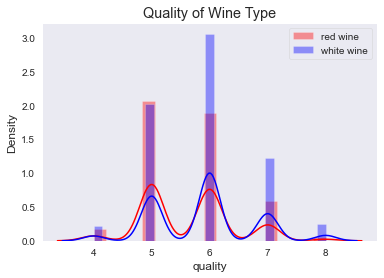

In [71]:
# 와인 유형에 따른 품질 등급 시각화 확률밀도추정(막대) kde커널 밀도 추정(곡선)
sns.set_style('dark')
sns.distplot(red_wine_quality, kde=True, color='red', label= 'red wine')
sns.distplot(white_wine_quality, kde=True, color='blue', label= 'white wine')
plt.title("Quality of Wine Type")
plt.legend()
plt.show()

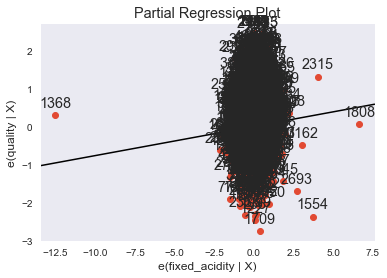

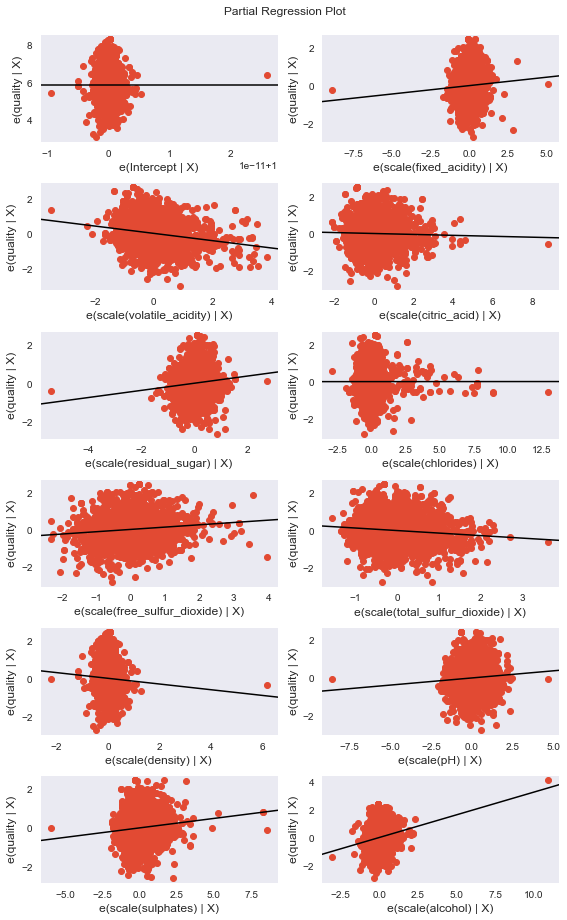

In [76]:
# 각 독립 변수가 종속변수에 미치는 영향 시각화 - 부분 회귀 플롯Added Variable Plot
import statsmodels.api as sm
others = list(set(train_data.columns).difference(set(['quality', 'fixed_acidity'])))
p, resids = sm.graphics.plot_partregress('quality', 'fixed_acidity', others, data = train_data, ret_coords=True)
plt.show()
fig = plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()

In [77]:
others

['total_sulfur_dioxide',
 'volatile_acidity',
 'density',
 'residual_sugar',
 'chlorides',
 'citric_acid',
 'sulphates',
 'id',
 'type',
 'free_sulfur_dioxide',
 'pH',
 'alcohol']

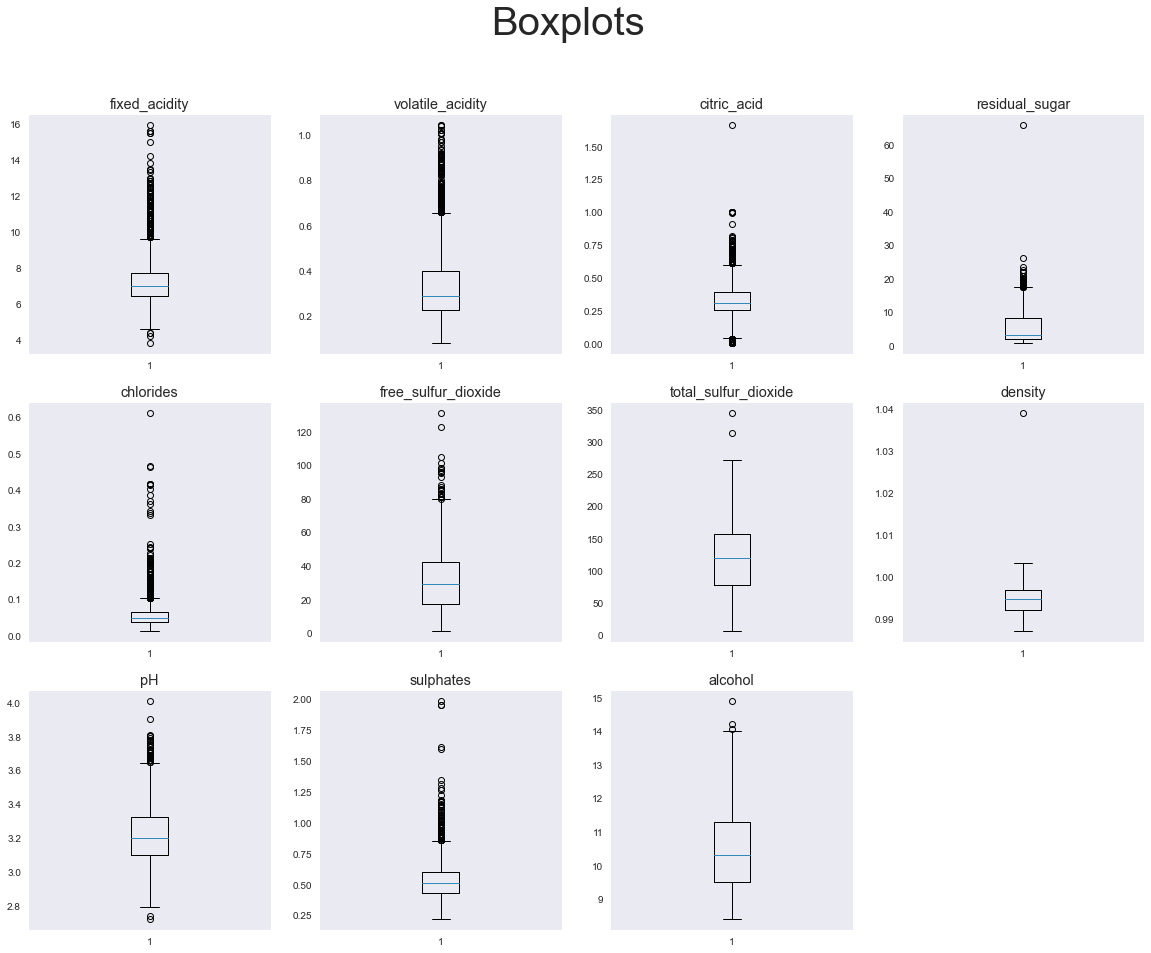

In [88]:
# Boxplot 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

# id, type, quality는 제외하고 시각화합니다.
cols = train_data.columns[1:-2]
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(train_data[cols[i]])
plt.show()

In [97]:
scaled_col = [x for x in train_data.columns[1:-2]]
scaled_col

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [186]:
from sklearn.preprocessing import RobustScaler #이상치가 많은 작은 데이터셋에 적합
scaled_data = train_data[scaled_col]
r_scaler = RobustScaler()

In [187]:
train_rscale = r_scaler.fit_transform(scaled_data)
rscaled_data = pd.DataFrame(train_rscale, columns=scaled_col)
rscaled_data

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.769231         -0.637681     0.428571       -0.285714  -0.269231   
1          0.384615          0.521739    -0.142857        0.285714  -1.000000   
2         -0.692308         -0.115942     0.142857       -0.142857  -1.000000   
3         -0.461538          0.173913     1.357143        1.206349   0.000000   
4          1.076923          0.463768     0.857143       -0.126984   0.615385   
...             ...               ...          ...             ...        ...   
3226      -0.461538         -0.753623     0.000000        0.349206  -0.153846   
3227      -0.461538         -0.637681    -0.214286        2.214286   0.000000   
3228      -0.769231         -0.057971    -0.428571       -0.206349  -0.192308   
3229       0.538462         -0.057971    -0.142857        0.603175  -0.230769   
3230       0.076923         -0.811594     0.214286        0.349206  -0.500000   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0                   -0.56             -0.294872 -0.775293 -0.636364   
1                    0.36             -0.076923 -0.975506 -0.545455   
2                   -0.12             -0.025641 -1.329073 -0.363636   
3                    1.12              1.115385  0.417465 -0.545455   
4                   -0.68             -1.282051  0.140575 -0.136364   
...                   ...                   ...       ...       ...   
3226                 0.52              0.487179 -0.061768  0.681818   
3227                 0.96              0.256410  0.511182  0.227273   
3228                -0.84             -0.141026 -0.413206 -0.545455   
3229                 0.00              0.564103  0.076677  1.090909   
3230                 0.16             -0.192308  0.097977  0.772727   

      sulphates   alcohol  
0      0.588235  1.000000  
1     -0.176471  1.500000  
2     -1.235294  1.222222  
3      0.529412 -0.500000  
4      1.764706  0.500000  
...         ...       ...  
3226  -0.235294  0.111111  
3227  -0.941176  0.111111  
3228   0.235294 -0.722222  
3229   0.529412  0.111111  
3230   0.058824 -0.555556  

[3231 rows x 11 columns]

In [188]:
scaled_data = test_data[scaled_col]
test_rscale = r_scaler.transform(scaled_data)
rscaled_data_test = pd.DataFrame(test_rscale, columns=scaled_col)
rscaled_data_test

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.230769          0.115942    -0.428571        0.563492  -0.576923   
1          1.307692          2.376812    -0.500000       -0.095238   6.884615   
2         -0.076923          1.971014    -2.142857       -0.111111   1.115385   
3         -0.538462         -0.347826     1.357143        1.158730  -0.153846   
4         -0.076923          1.449275    -1.928571       -0.015873   1.153846   
...             ...               ...          ...             ...        ...   
3226       0.076923          0.173913    -0.500000        1.587302   0.115385   
3227      -1.076923         -0.057971     0.642857        0.476190  -0.500000   
3228       0.230769          0.115942     2.714286        1.126984  -0.230769   
3229      -1.384615          0.289855     0.428571        0.492063  -0.615385   
3230      -0.076923         -0.521739     0.357143       -0.253968  -0.615385   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0                    0.04              0.243590 -0.511182 -1.363636   
1                   -0.96             -1.333333  0.907348  0.545455   
2                   -0.60             -1.025641  0.080937  0.636364   
3                    1.28              0.166667  0.123536 -1.545455   
4                   -0.88             -1.179487  0.822151  2.227273   
...                   ...                   ...       ...       ...   
3226                 0.92              1.089744  0.673056 -0.454545   
3227                 0.28             -0.012821 -0.724175  0.045455   
3228                 1.16              0.525641  0.609159 -0.636364   
3229                 0.52              0.179487 -0.869010  0.227273   
3230                 0.36              0.358974 -0.370607  0.681818   

      sulphates   alcohol  
0     -0.823529  0.444444  
1      0.529412 -0.722222  
2      0.117647  0.277778  
3     -0.294118 -0.666667  
4      2.352941 -0.500000  
...         ...       ...  
3226  -0.117647 -0.833333  
3227  -0.470588  1.000000  
3228  -0.352941 -0.944444  
3229  -0.588235  1.222222  
3230   0.294118  0.388889  

[3231 rows x 11 columns]

In [189]:
rscaled_data_train = pd.concat([rscaled_data, train_data['type'],train_data['quality']], axis=1)
rscaled_data_test = pd.concat([rscaled_data_test, test_data['type']], axis=1)

In [190]:
rscaled_data_train

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.769231         -0.637681     0.428571       -0.285714  -0.269231   
1          0.384615          0.521739    -0.142857        0.285714  -1.000000   
2         -0.692308         -0.115942     0.142857       -0.142857  -1.000000   
3         -0.461538          0.173913     1.357143        1.206349   0.000000   
4          1.076923          0.463768     0.857143       -0.126984   0.615385   
...             ...               ...          ...             ...        ...   
3226      -0.461538         -0.753623     0.000000        0.349206  -0.153846   
3227      -0.461538         -0.637681    -0.214286        2.214286   0.000000   
3228      -0.769231         -0.057971    -0.428571       -0.206349  -0.192308   
3229       0.538462         -0.057971    -0.142857        0.603175  -0.230769   
3230       0.076923         -0.811594     0.214286        0.349206  -0.500000   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0                   -0.56             -0.294872 -0.775293 -0.636364   
1                    0.36             -0.076923 -0.975506 -0.545455   
2                   -0.12             -0.025641 -1.329073 -0.363636   
3                    1.12              1.115385  0.417465 -0.545455   
4                   -0.68             -1.282051  0.140575 -0.136364   
...                   ...                   ...       ...       ...   
3226                 0.52              0.487179 -0.061768  0.681818   
3227                 0.96              0.256410  0.511182  0.227273   
3228                -0.84             -0.141026 -0.413206 -0.545455   
3229                 0.00              0.564103  0.076677  1.090909   
3230                 0.16             -0.192308  0.097977  0.772727   

      sulphates   alcohol   type  quality  
0      0.588235  1.000000  white        6  
1     -0.176471  1.500000  white        7  
2     -1.235294  1.222222  white        6  
3      0.529412 -0.500000  white        5  
4      1.764706  0.500000    red        7  
...         ...       ...    ...      ...  
3226  -0.235294  0.111111  white        5  
3227  -0.941176  0.111111  white        6  
3228   0.235294 -0.722222  white        5  
3229   0.529412  0.111111  white        6  
3230   0.058824 -0.555556  white        7  

[3231 rows x 13 columns]

In [191]:
rscaled_data_test

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.230769          0.115942    -0.428571        0.563492  -0.576923   
1          1.307692          2.376812    -0.500000       -0.095238   6.884615   
2         -0.076923          1.971014    -2.142857       -0.111111   1.115385   
3         -0.538462         -0.347826     1.357143        1.158730  -0.153846   
4         -0.076923          1.449275    -1.928571       -0.015873   1.153846   
...             ...               ...          ...             ...        ...   
3226       0.076923          0.173913    -0.500000        1.587302   0.115385   
3227      -1.076923         -0.057971     0.642857        0.476190  -0.500000   
3228       0.230769          0.115942     2.714286        1.126984  -0.230769   
3229      -1.384615          0.289855     0.428571        0.492063  -0.615385   
3230      -0.076923         -0.521739     0.357143       -0.253968  -0.615385   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0                    0.04              0.243590 -0.511182 -1.363636   
1                   -0.96             -1.333333  0.907348  0.545455   
2                   -0.60             -1.025641  0.080937  0.636364   
3                    1.28              0.166667  0.123536 -1.545455   
4                   -0.88             -1.179487  0.822151  2.227273   
...                   ...                   ...       ...       ...   
3226                 0.92              1.089744  0.673056 -0.454545   
3227                 0.28             -0.012821 -0.724175  0.045455   
3228                 1.16              0.525641  0.609159 -0.636364   
3229                 0.52              0.179487 -0.869010  0.227273   
3230                 0.36              0.358974 -0.370607  0.681818   

      sulphates   alcohol   type  
0     -0.823529  0.444444  white  
1      0.529412 -0.722222    red  
2      0.117647  0.277778    red  
3     -0.294118 -0.666667  white  
4      2.352941 -0.500000    red  
...         ...       ...    ...  
3226  -0.117647 -0.833333  white  
3227  -0.470588  1.000000  white  
3228  -0.352941 -0.944444  white  
3229  -0.588235  1.222222  white  
3230   0.294118  0.388889  white  

[3231 rows x 12 columns]

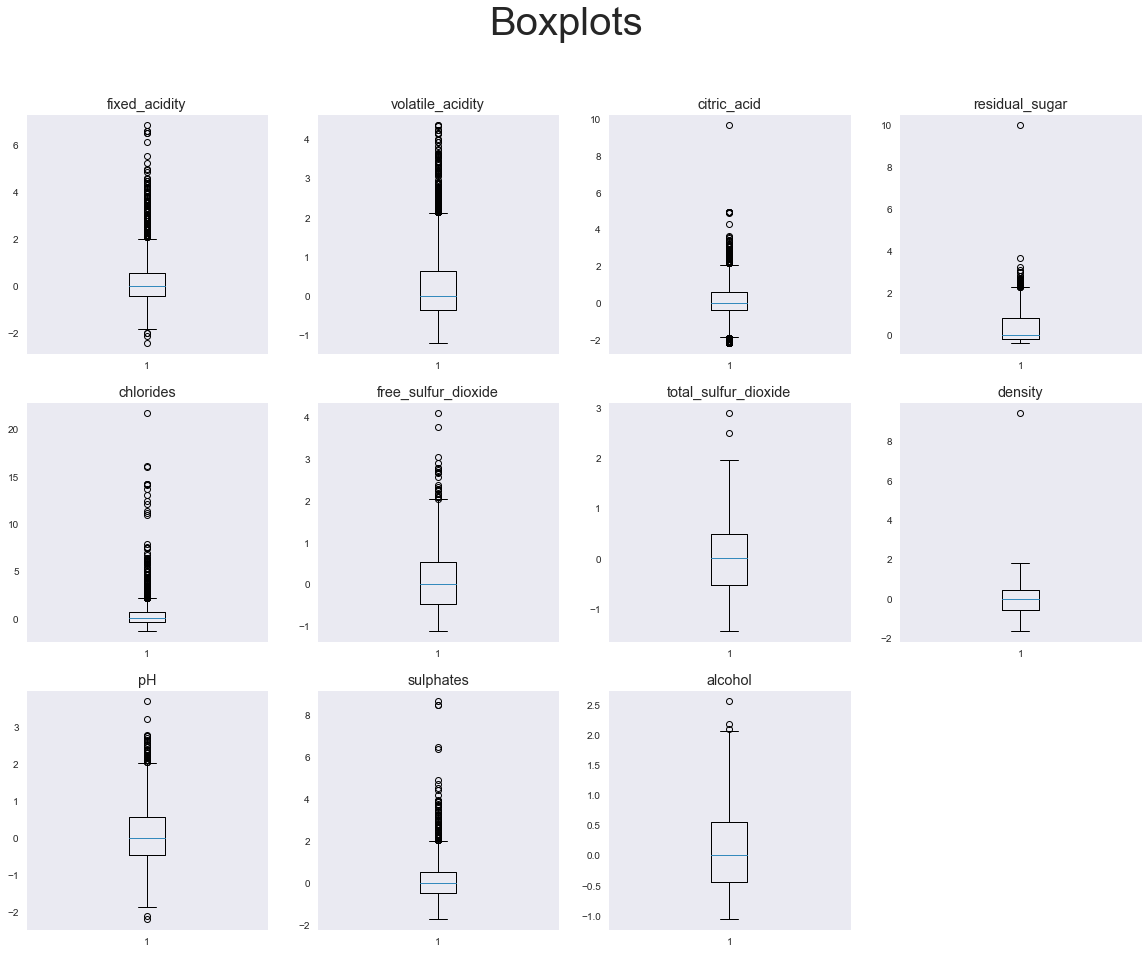

In [192]:
# Boxplot 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

# type, quality는 제외하고 시각화합니다.
cols = rscaled_data_train.columns[0:-2]
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(rscaled_data_train[cols[i]])
plt.show()

In [193]:
before_remove = len(rscaled_data_train)
rscaled_data_train[scaled_col] = np.where(abs(train_rscale) > 2.5, np.nan, train_rscale)
rscaled_data_train = rscaled_data_train.dropna()
print('Removed : -', before_remove - len(rscaled_data_train))

Removed : - 408


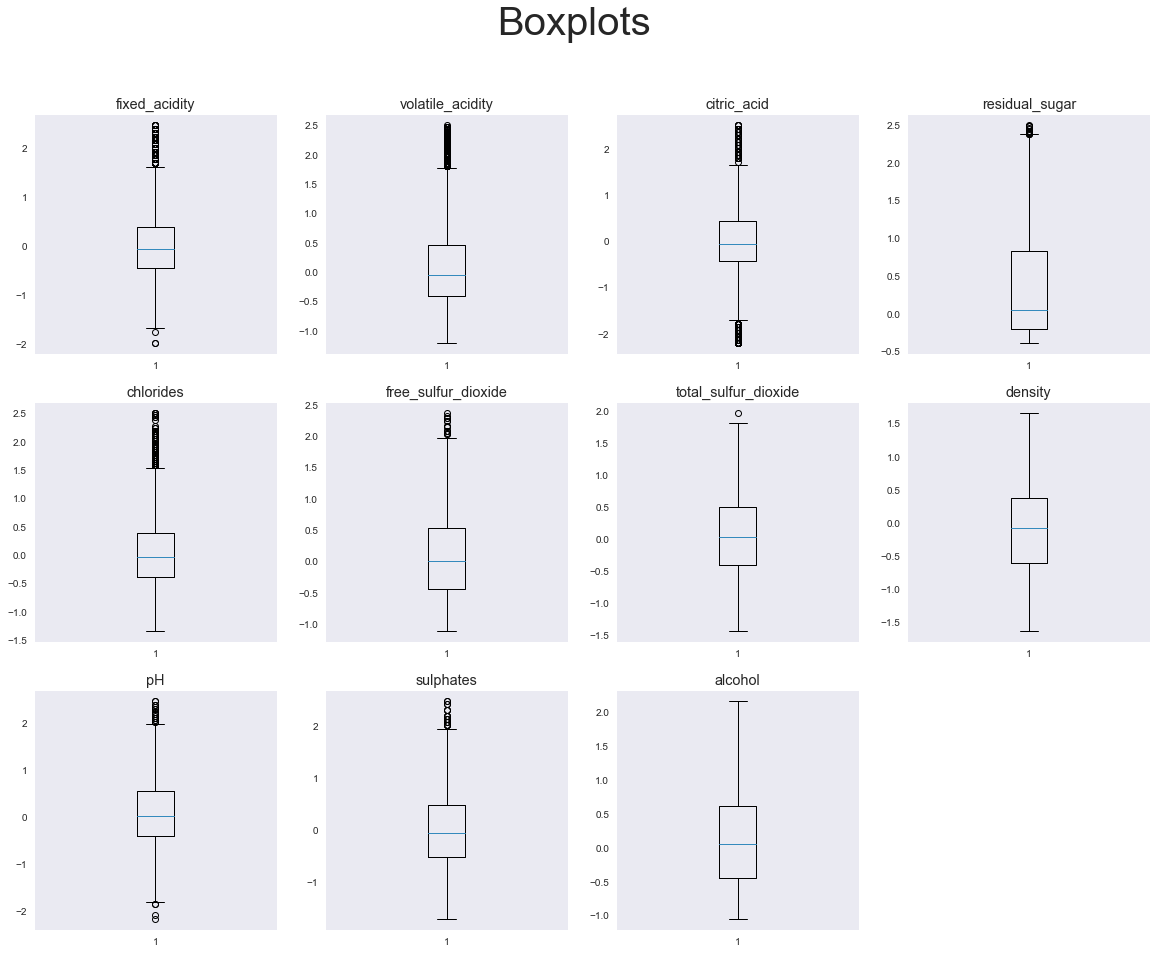

In [194]:
# Boxplot 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

# type, quality는 제외하고 시각화합니다.
cols = rscaled_data_train.columns[0:-2]
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(rscaled_data_train[cols[i]])
plt.show()

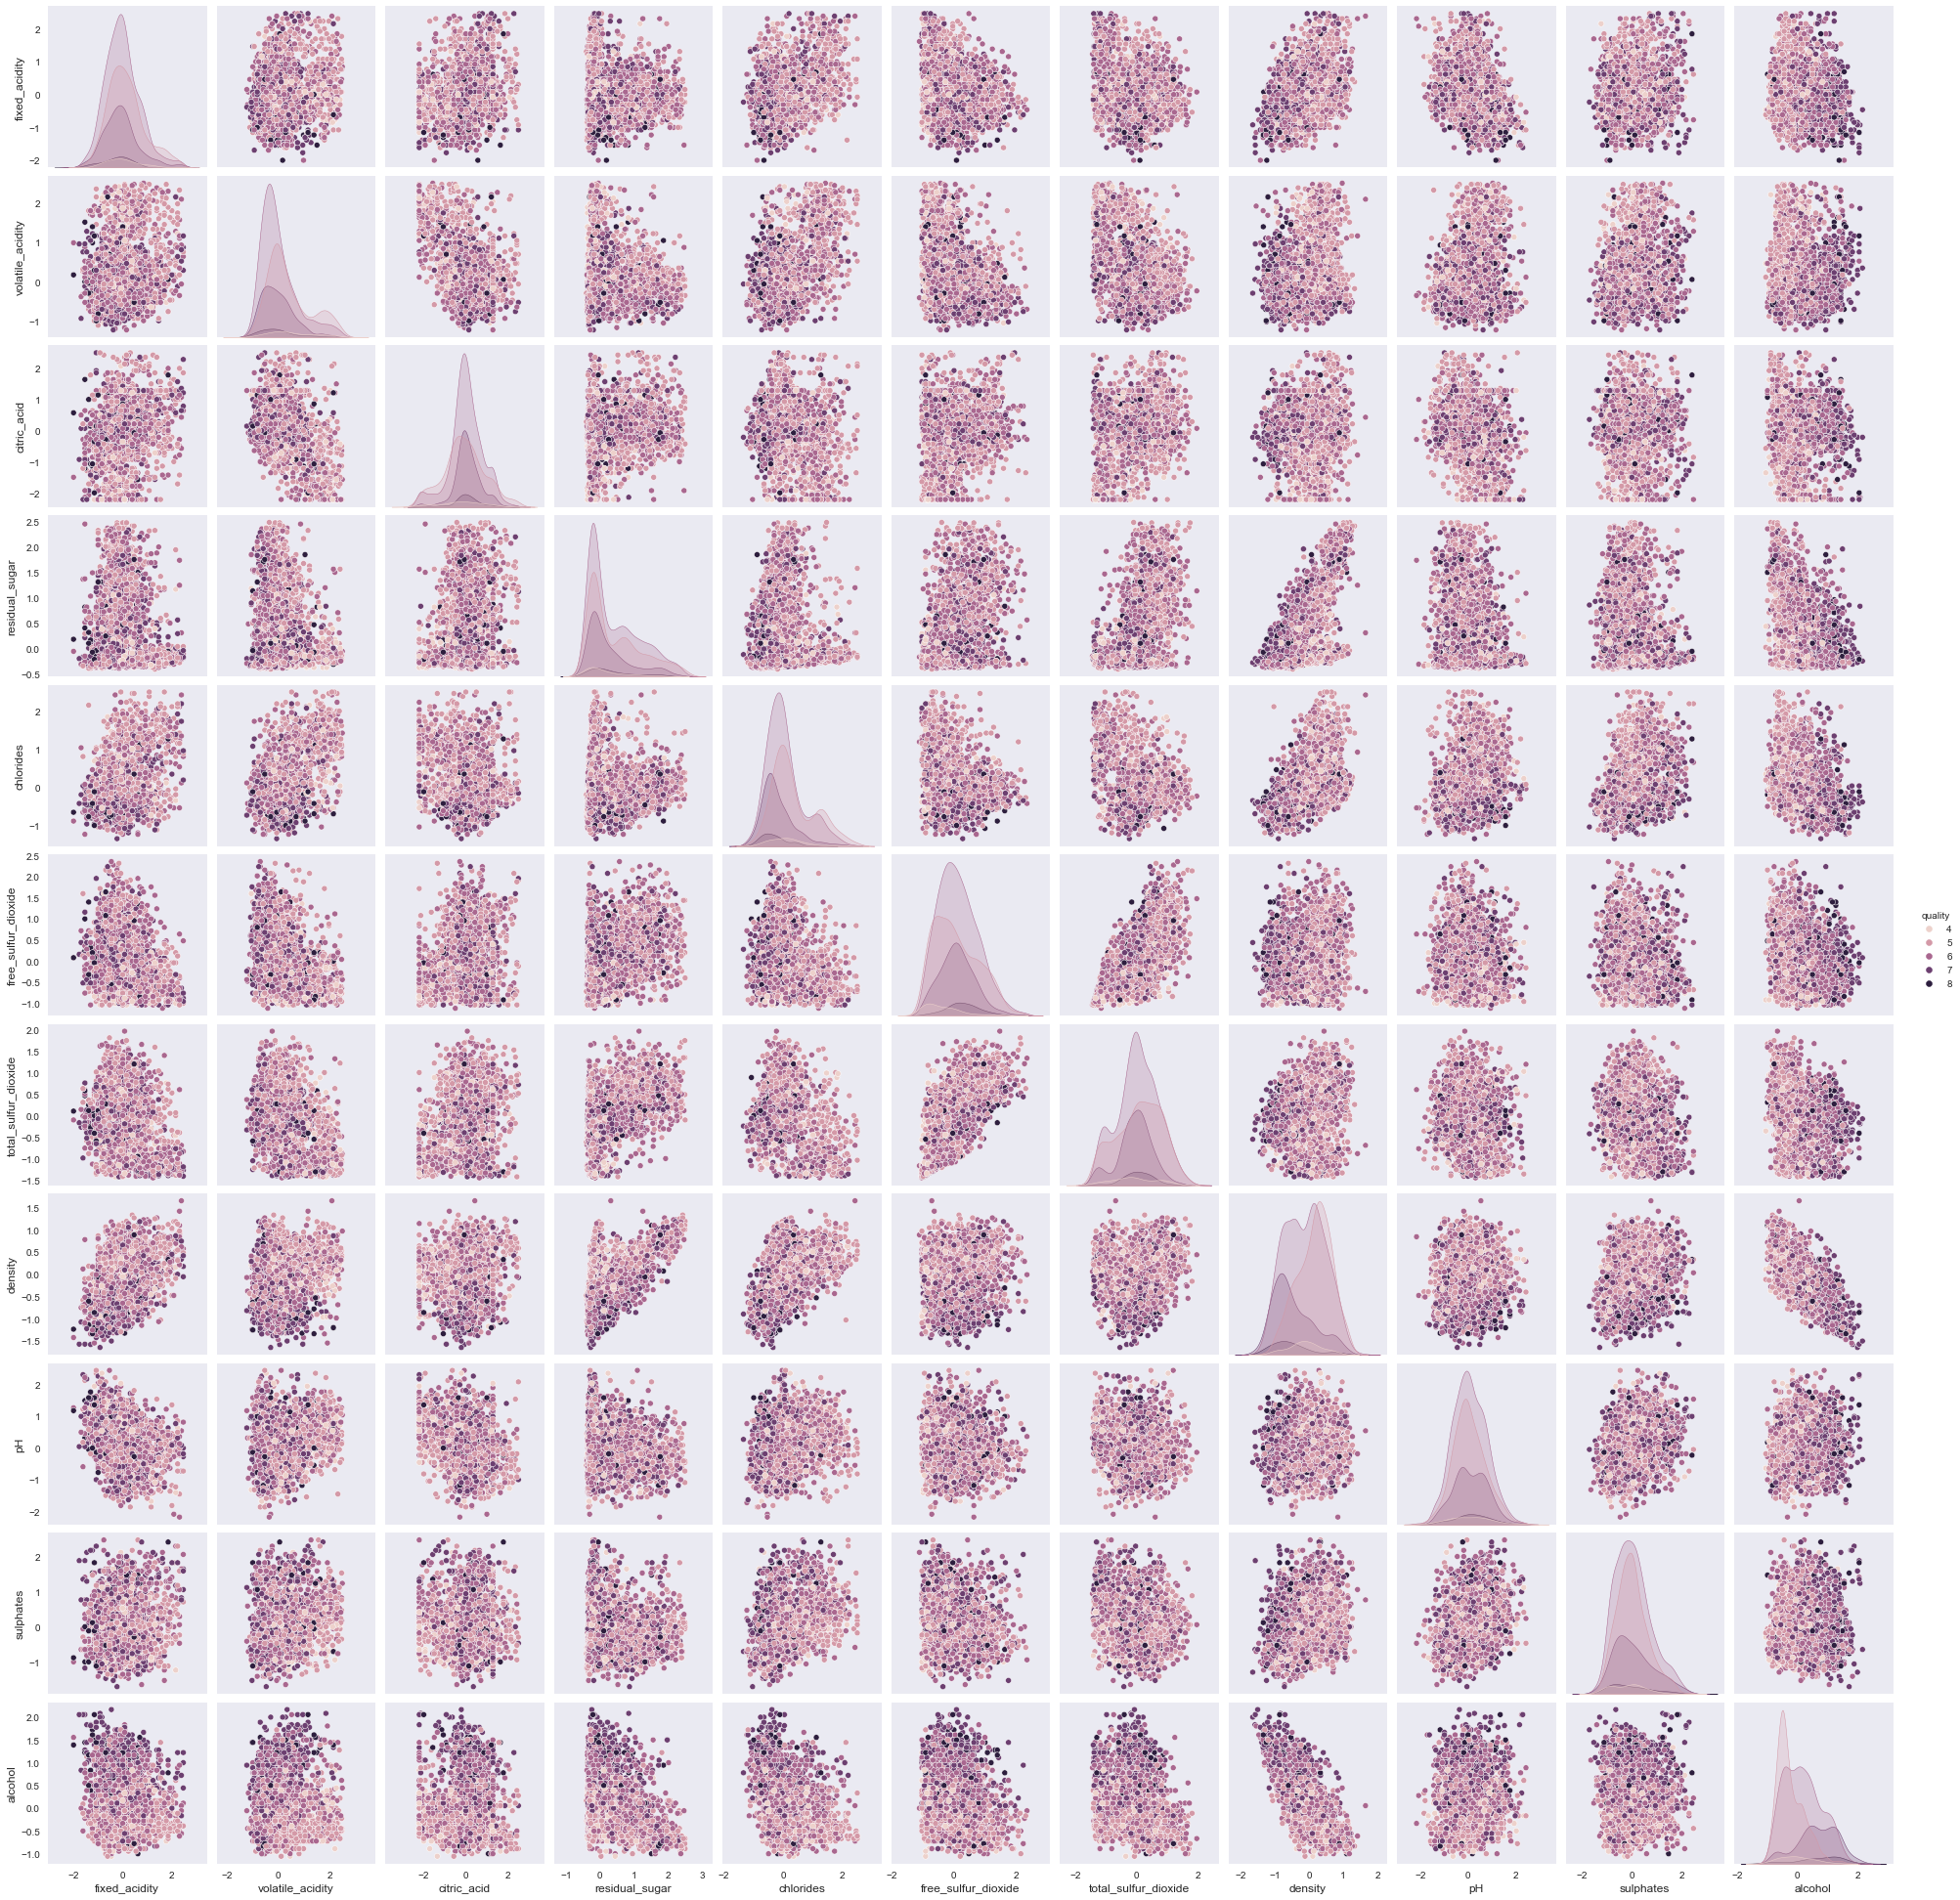

In [153]:
# 각 특징값의 분포와 상관관계를 히스토그램과 스캐터플롯으로 나타낸다.
sns.pairplot(rscaled_data_train, hue='quality')
plt.show()

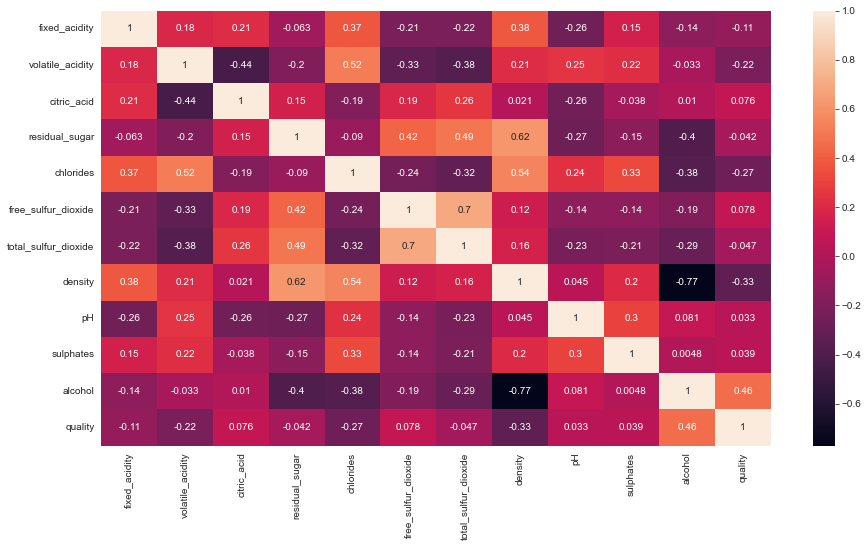

In [155]:
plt.figure(figsize=(15,8))
sns.heatmap(rscaled_data_train.corr(), annot=True)
plt.show()

In [195]:
rscaled_data_train.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    2823.000000       2823.000000  2823.000000     2823.000000   
mean        0.013583          0.144979    -0.025631        0.387081   
std         0.736546          0.776908     0.850591        0.736856   
min        -2.000000         -1.217391    -2.214286       -0.396825   
25%        -0.461538         -0.405797    -0.428571       -0.206349   
50%        -0.076923         -0.057971    -0.071429        0.047619   
75%         0.384615          0.463768     0.428571        0.825397   
max         2.461538          2.492754     2.500000        2.492063   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  2823.000000          2823.000000           2823.000000  2823.000000   
mean      0.090834             0.091895              0.018636    -0.107236   
std       0.689592             0.661297              0.677295     0.608029   
min      -1.346154            -1.120000             -1.448718    -1.646432   
25%      -0.384615            -0.440000             -0.410256    -0.609159   
50%      -0.038462             0.000000              0.025641    -0.083067   
75%       0.384615             0.520000              0.487179     0.364217   
max       2.500000             2.360000              1.961538     1.652822   

                pH    sulphates      alcohol      quality  
count  2823.000000  2823.000000  2823.000000  2823.000000  
mean      0.070911     0.024234     0.130884     5.859724  
std       0.713057     0.715607     0.668240     0.847820  
min      -2.181818    -1.705882    -1.055556     4.000000  
25%      -0.409091    -0.529412    -0.444444     5.000000  
50%       0.000000    -0.058824     0.055556     6.000000  
75%       0.545455     0.470588     0.611111     6.000000  
max       2.454545     2.470588     2.166667     8.000000

In [201]:
rscaled_data_train['quality'].value_counts()

6    1246
5     909
7     499
8      88
4      81
Name: quality, dtype: int64

In [197]:
r_train_y = rscaled_data_train['quality']
r_train_X = rscaled_data_train.drop(['quality'],axis=1)

In [198]:
r_train_X

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.769231         -0.637681     0.428571       -0.285714  -0.269231   
1          0.384615          0.521739    -0.142857        0.285714  -1.000000   
2         -0.692308         -0.115942     0.142857       -0.142857  -1.000000   
3         -0.461538          0.173913     1.357143        1.206349   0.000000   
4          1.076923          0.463768     0.857143       -0.126984   0.615385   
...             ...               ...          ...             ...        ...   
3226      -0.461538         -0.753623     0.000000        0.349206  -0.153846   
3227      -0.461538         -0.637681    -0.214286        2.214286   0.000000   
3228      -0.769231         -0.057971    -0.428571       -0.206349  -0.192308   
3229       0.538462         -0.057971    -0.142857        0.603175  -0.230769   
3230       0.076923         -0.811594     0.214286        0.349206  -0.500000   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0                   -0.56             -0.294872 -0.775293 -0.636364   
1                    0.36             -0.076923 -0.975506 -0.545455   
2                   -0.12             -0.025641 -1.329073 -0.363636   
3                    1.12              1.115385  0.417465 -0.545455   
4                   -0.68             -1.282051  0.140575 -0.136364   
...                   ...                   ...       ...       ...   
3226                 0.52              0.487179 -0.061768  0.681818   
3227                 0.96              0.256410  0.511182  0.227273   
3228                -0.84             -0.141026 -0.413206 -0.545455   
3229                 0.00              0.564103  0.076677  1.090909   
3230                 0.16             -0.192308  0.097977  0.772727   

      sulphates   alcohol   type  
0      0.588235  1.000000  white  
1     -0.176471  1.500000  white  
2     -1.235294  1.222222  white  
3      0.529412 -0.500000  white  
4      1.764706  0.500000    red  
...         ...       ...    ...  
3226  -0.235294  0.111111  white  
3227  -0.941176  0.111111  white  
3228   0.235294 -0.722222  white  
3229   0.529412  0.111111  white  
3230   0.058824 -0.555556  white  

[2823 rows x 12 columns]

In [199]:
r_train_y

0       6
1       7
2       6
3       5
4       7
       ..
3226    5
3227    6
3228    5
3229    6
3230    7
Name: quality, Length: 2823, dtype: int64

In [203]:
word_to_num = {"white":0, "red":1}

r_train_X['type'] = r_train_X['type'].replace(word_to_num)
r_train_X

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.769231         -0.637681     0.428571       -0.285714  -0.269231   
1          0.384615          0.521739    -0.142857        0.285714  -1.000000   
2         -0.692308         -0.115942     0.142857       -0.142857  -1.000000   
3         -0.461538          0.173913     1.357143        1.206349   0.000000   
4          1.076923          0.463768     0.857143       -0.126984   0.615385   
...             ...               ...          ...             ...        ...   
3226      -0.461538         -0.753623     0.000000        0.349206  -0.153846   
3227      -0.461538         -0.637681    -0.214286        2.214286   0.000000   
3228      -0.769231         -0.057971    -0.428571       -0.206349  -0.192308   
3229       0.538462         -0.057971    -0.142857        0.603175  -0.230769   
3230       0.076923         -0.811594     0.214286        0.349206  -0.500000   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0                   -0.56             -0.294872 -0.775293 -0.636364   
1                    0.36             -0.076923 -0.975506 -0.545455   
2                   -0.12             -0.025641 -1.329073 -0.363636   
3                    1.12              1.115385  0.417465 -0.545455   
4                   -0.68             -1.282051  0.140575 -0.136364   
...                   ...                   ...       ...       ...   
3226                 0.52              0.487179 -0.061768  0.681818   
3227                 0.96              0.256410  0.511182  0.227273   
3228                -0.84             -0.141026 -0.413206 -0.545455   
3229                 0.00              0.564103  0.076677  1.090909   
3230                 0.16             -0.192308  0.097977  0.772727   

      sulphates   alcohol  type  
0      0.588235  1.000000     0  
1     -0.176471  1.500000     0  
2     -1.235294  1.222222     0  
3      0.529412 -0.500000     0  
4      1.764706  0.500000     1  
...         ...       ...   ...  
3226  -0.235294  0.111111     0  
3227  -0.941176  0.111111     0  
3228   0.235294 -0.722222     0  
3229   0.529412  0.111111     0  
3230   0.058824 -0.555556     0  

[2823 rows x 12 columns]

In [204]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(r_train_X, r_train_y)

In [208]:
X_res.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6230.000000       6230.000000  6230.000000     6230.000000   
mean       -0.026226          0.167204    -0.059929        0.316076   
std         0.686474          0.767259     0.803439        0.677303   
min        -2.000000         -1.217391    -2.214286       -0.396825   
25%        -0.461538         -0.393426    -0.376908       -0.206349   
50%        -0.076923          0.000000    -0.036409        0.031283   
75%         0.307692          0.501237     0.357143        0.682540   
max         2.461538          2.492754     2.500000        2.492063   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6230.000000          6230.000000           6230.000000  6230.000000   
mean      0.009826             0.040568             -0.003852    -0.216226   
std       0.640056             0.640501              0.629429     0.595842   
min      -1.346154            -1.120000             -1.448718    -1.646432   
25%      -0.459218            -0.460293             -0.353517    -0.711016   
50%      -0.115385             0.000000             -0.008651    -0.259851   
75%       0.305176             0.480000              0.435077     0.225772   
max       2.500000             2.360000              1.961538     1.652822   

                pH    sulphates      alcohol         type  
count  6230.000000  6230.000000  6230.000000  6230.000000  
mean      0.088032    -0.015086     0.236915     0.137400  
std       0.706686     0.710180     0.702831     0.344296  
min      -2.181818    -1.705882    -1.055556     0.000000  
25%      -0.409091    -0.588235    -0.388889     0.000000  
50%       0.087572    -0.062289     0.166667     0.000000  
75%       0.585025     0.419219     0.777778     0.000000  
max       2.454545     2.470588     2.166667     1.000000

In [206]:
y_res.value_counts()

6    1246
7    1246
5    1246
8    1246
4    1246
Name: quality, dtype: int64

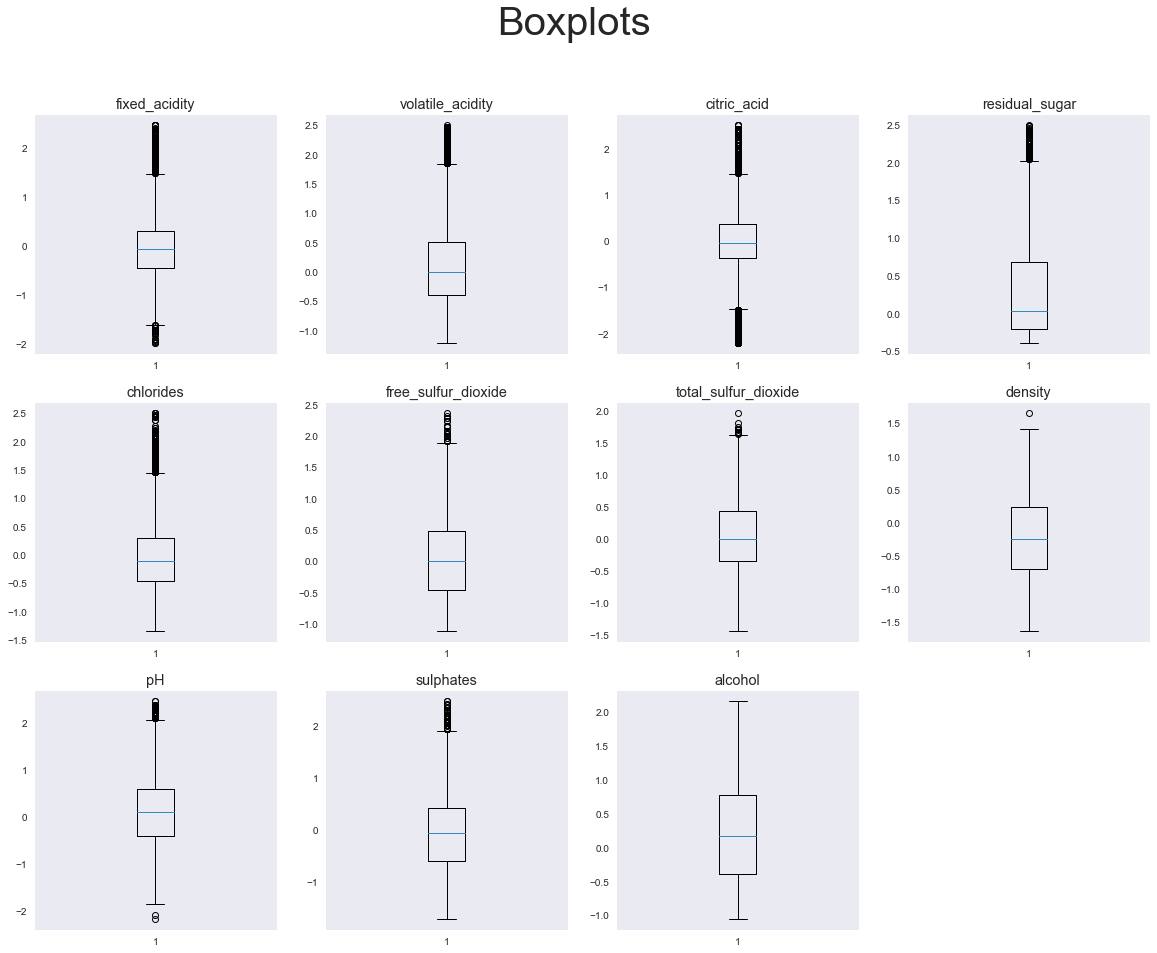

In [210]:
# Boxplot 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

# type, quality는 제외하고 시각화합니다.
cols = X_res.columns[:-1]
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(X_res[cols[i]])
plt.show()

In [227]:
from sklearn.model_selection import train_test_split
X_train_resample,  X_test_resample, y_train_resample, y_test_resample = train_test_split(X_res, y_res, test_size=0.2, random_state=1)

from sklearn.ensemble import RandomForestClassifier
forest_resample = RandomForestClassifier(n_estimators=1500, random_state=1, class_weight='balanced')
forest_resample.fit(X_train_resample, y_train_resample)

prediction = forest_resample.predict(X_test_resample)
score = ACCURACY(y_test_resample, prediction)
print(f'모델의 정확도: {score*100:.2f}%')

모델의 정확도: 83.31%


In [217]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_resample, y_train_resample)
prediction = gbc.predict(X_test_resample)
score = ACCURACY(y_test_resample, prediction)
print(f'모델의 정확도: {score*100:.2f}%')

모델의 정확도: 71.67%


In [ ]:
# 4등급만 따로해보기
# red wine, white wine 따로

In [235]:
rscaled_data_test

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.230769          0.115942    -0.428571        0.563492  -0.576923   
1          1.307692          2.376812    -0.500000       -0.095238   6.884615   
2         -0.076923          1.971014    -2.142857       -0.111111   1.115385   
3         -0.538462         -0.347826     1.357143        1.158730  -0.153846   
4         -0.076923          1.449275    -1.928571       -0.015873   1.153846   
...             ...               ...          ...             ...        ...   
3226       0.076923          0.173913    -0.500000        1.587302   0.115385   
3227      -1.076923         -0.057971     0.642857        0.476190  -0.500000   
3228       0.230769          0.115942     2.714286        1.126984  -0.230769   
3229      -1.384615          0.289855     0.428571        0.492063  -0.615385   
3230      -0.076923         -0.521739     0.357143       -0.253968  -0.615385   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0                    0.04              0.243590 -0.511182 -1.363636   
1                   -0.96             -1.333333  0.907348  0.545455   
2                   -0.60             -1.025641  0.080937  0.636364   
3                    1.28              0.166667  0.123536 -1.545455   
4                   -0.88             -1.179487  0.822151  2.227273   
...                   ...                   ...       ...       ...   
3226                 0.92              1.089744  0.673056 -0.454545   
3227                 0.28             -0.012821 -0.724175  0.045455   
3228                 1.16              0.525641  0.609159 -0.636364   
3229                 0.52              0.179487 -0.869010  0.227273   
3230                 0.36              0.358974 -0.370607  0.681818   

      sulphates   alcohol   type  
0     -0.823529  0.444444  white  
1      0.529412 -0.722222    red  
2      0.117647  0.277778    red  
3     -0.294118 -0.666667  white  
4      2.352941 -0.500000    red  
...         ...       ...    ...  
3226  -0.117647 -0.833333  white  
3227  -0.470588  1.000000  white  
3228  -0.352941 -0.944444  white  
3229  -0.588235  1.222222  white  
3230   0.294118  0.388889  white  

[3231 rows x 12 columns]

In [240]:
rscaled_data_test['type'] = rscaled_data_test['type'].replace(word_to_num)
rscaled_data_test

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.230769          0.115942    -0.428571        0.563492  -0.576923   
1          1.307692          2.376812    -0.500000       -0.095238   6.884615   
2         -0.076923          1.971014    -2.142857       -0.111111   1.115385   
3         -0.538462         -0.347826     1.357143        1.158730  -0.153846   
4         -0.076923          1.449275    -1.928571       -0.015873   1.153846   
...             ...               ...          ...             ...        ...   
3226       0.076923          0.173913    -0.500000        1.587302   0.115385   
3227      -1.076923         -0.057971     0.642857        0.476190  -0.500000   
3228       0.230769          0.115942     2.714286        1.126984  -0.230769   
3229      -1.384615          0.289855     0.428571        0.492063  -0.615385   
3230      -0.076923         -0.521739     0.357143       -0.253968  -0.615385   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0                    0.04              0.243590 -0.511182 -1.363636   
1                   -0.96             -1.333333  0.907348  0.545455   
2                   -0.60             -1.025641  0.080937  0.636364   
3                    1.28              0.166667  0.123536 -1.545455   
4                   -0.88             -1.179487  0.822151  2.227273   
...                   ...                   ...       ...       ...   
3226                 0.92              1.089744  0.673056 -0.454545   
3227                 0.28             -0.012821 -0.724175  0.045455   
3228                 1.16              0.525641  0.609159 -0.636364   
3229                 0.52              0.179487 -0.869010  0.227273   
3230                 0.36              0.358974 -0.370607  0.681818   

      sulphates   alcohol  type  
0     -0.823529  0.444444     0  
1      0.529412 -0.722222     1  
2      0.117647  0.277778     1  
3     -0.294118 -0.666667     0  
4      2.352941 -0.500000     1  
...         ...       ...   ...  
3226  -0.117647 -0.833333     0  
3227  -0.470588  1.000000     0  
3228  -0.352941 -0.944444     0  
3229  -0.588235  1.222222     0  
3230   0.294118  0.388889     0  

[3231 rows x 12 columns]

In [241]:
forest_resample = RandomForestClassifier(n_estimators=1500, random_state=1, class_weight='balanced')
forest_resample.fit(X_res, y_res)
prediction = forest_resample.predict(rscaled_data_test)

In [245]:
submission = pd.read_csv('./_data/sample_submission.csv')
submission['quality']= prediction
submission.to_csv('./_data/output/211210_submission.csv', index=False)